In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical, load_img
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [3]:
%cd /content/drive/MyDrive/Colab\ Notebooks/Emotion
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/validation'

/content/drive/MyDrive/Colab Notebooks/Emotion


In [ ]:
def createdataframe(dir):
    images_path, labels = [], []
    if not os.path.exists(dir):
        print(f"Error: Directory {dir} not found.")
        return pd.DataFrame()

    for label in os.listdir(dir):
        label_path = os.path.join(dir, label)
        if not os.path.isdir(label_path):
            continue
        for imagename in os.listdir(label_path):
            img_path = os.path.join(label_path, imagename)
            if os.path.isfile(img_path):
                images_path.append(img_path)
                labels.append(label)
        print(f"{label} - {len(images_path)} images loaded")
    return pd.DataFrame({'image': images_path, 'label': labels})

In [ ]:
train = createdataframe(TRAIN_DIR)
test = createdataframe(TEST_DIR)

angry - 3993 images loaded
disgust - 4429 images loaded
fear - 8532 images loaded
happy - 15696 images loaded
neutral - 20678 images loaded
sad - 25616 images loaded
surprise - 28821 images loaded
angry - 960 images loaded
disgust - 1071 images loaded
fear - 2089 images loaded
happy - 3914 images loaded
neutral - 5130 images loaded
sad - 6269 images loaded
surprise - 7066 images loaded


In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        try:
            img = load_img(image, color_mode="grayscale", target_size=(48, 48))
            img = np.array(img).reshape(48, 48, 1)
            features.append(img)
        except Exception as e:
            print(f"Error loading image {image}: {e}")
    return np.array(features) / 255.0


In [ ]:
x_train, x_test = extract_features(train['image']), extract_features(test['image'])
le = LabelEncoder()
y_train, y_test = to_categorical(le.fit_transform(train['label']), num_classes=7), to_categorical(le.transform(test['label']), num_classes=7)

  0%|          | 0/28821 [00:00<?, ?it/s]

  0%|          | 0/7066 [00:00<?, ?it/s]

In [ ]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(7, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

## Save extracted data

In [ ]:
np.save("x_train.npy", x_train)
np.save("x_test.npy", x_test)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)

In [ ]:
x_train = np.load("x_train.npy")
x_test = np.load("x_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

### or

In [4]:
import pickle

In [ ]:
with open("train_test_data.pkl", "wb") as f:
    pickle.dump((x_train, x_test, y_train, y_test), f)

In [5]:
with open("train_test_data.pkl", "rb") as f:
    x_train, x_test, y_train, y_test = pickle.load(f)

## Train

In [6]:
from tensorflow.keras.models import load_model

In [7]:
model = load_model("trained.keras")

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=40,validation_data=(x_test, y_test))

In [ ]:
model.save("trained.keras")

In [8]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
def predict_emotion(image_path):
    img = load_img(image_path, color_mode="grayscale", target_size=(48, 48))
    img = np.array(img).reshape(1, 48, 48, 1) / 255.0
    pred_label = label[np.argmax(model.predict(img))]
    plt.imshow(img.reshape(48, 48), cmap='gray')
    plt.title(f"Predicted: {pred_label}")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


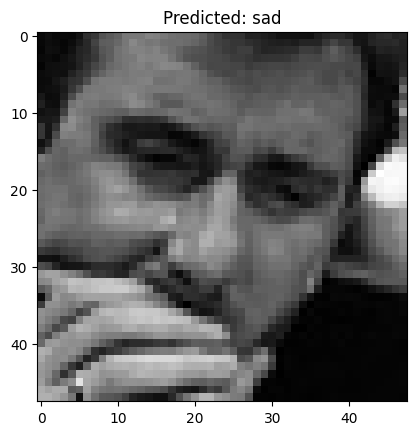

In [18]:
predict_emotion('images/validation/sad/505.jpg')